In [55]:
import os
import shutil
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)

In [2]:
#path = r"C:\Users\anikd\Desktop\Registration\FSL_Tissue_Segmentation_non-artifact/"
#destination = r"C:\Users\anikd\Desktop\Anomaly_Detection\NC_non-artifact_WM_Seg"

#for folder in os.listdir(path):
#    for file in os.listdir(path + folder):
#        if file.endswith("seg_2.nii.gz"):
#            shutil.copy(path+folder+"/"+file, destination)

In [3]:
#path = r"C:\Users\anikd\Desktop\Registration\FSL_Tissue_Segmentation_artifact/"
#destination = r"C:\Users\anikd\Desktop\Anomaly_Detection\NC_artifact_WM_Seg"

#for folder in os.listdir(path):
#    for file in os.listdir(path + folder):
#        if file.endswith("seg_2.nii.gz"):
#            shutil.copy(path+folder+"/"+file, destination)

In [4]:
#preprocessed_mri_path = r"C:\Users\anikd\Desktop\Anomaly_Detection\Voxel_Calculation\NC_preprocessed_MRI"
#BM_path = r"C:\Users\anikd\Desktop\Anomaly_Detection\Voxel_Calculation\NC_Masks"

#for file in os.listdir(preprocessed_mri_path):
#    mri = nib.load(preprocessed_mri_path + "/" + file)
#    mri_data = mri.get_fdata()
    
#    binary_mask = (mri_data > 0)
    
#    new_name = file.split(".")[0] + "_mask.nii.gz"
#    affine = mri.affine
#    header = mri.header
    
#    nib.save(nib.Nifti1Image(binary_mask, affine, header), BM_path + "/" + new_name)

# Counting Brain Voxels from the Binary Mask

In [5]:
BM_path = r"C:\Users\anikd\Desktop\Anomaly_Detection\Voxel_Calculation\NC_Masks"

brain_voxel_count = []
file_list = []
for file in os.listdir(BM_path):
    mask = nib.load(BM_path + "/" + file)
    mask = mask.get_fdata()
    
    filename = file.split("_mask")[0]
    file_list.append(filename)
    
    brain_voxel_count.append(np.sum(mask == 1.0))

# Counting Gray Voxels from the Gray-Matter Segmentation Mask

In [6]:
GM_path = r"C:\Users\anikd\Desktop\Anomaly_Detection\Voxel_Calculation\NC_GM_Seg"

gm_voxel_count = []

for file in os.listdir(GM_path):
    gm_seg = nib.load(GM_path + "/" + file)
    gm_seg_data = gm_seg.get_fdata()
    
    gm_voxel_count.append(np.sum(gm_seg_data == 1.0))

# Counting White Voxels from the White-Matter Segmentation Mask

In [7]:
WM_path = r"C:\Users\anikd\Desktop\Anomaly_Detection\Voxel_Calculation\NC_WM_Seg"

wm_voxel_count = []

for file in os.listdir(WM_path):
    wm_seg = nib.load(WM_path + "/" + file)
    wm_seg_data = wm_seg.get_fdata()
    
    wm_voxel_count.append(np.sum(wm_seg_data == 1.0))

# Calculating the Black Voxel by Subtracting Gray Voxel from Total Brain Voxel

In [8]:
black_in_GM = [total - gray for total, gray in zip(brain_voxel_count, gm_voxel_count)]
black_in_WM = [total - white for total, white in zip(brain_voxel_count, wm_voxel_count)]

# Calculating the Ratio of Black-to-Gray and Black-to-White

In [9]:
black_GM_ratios = [black / gray for black, gray in zip(black_in_GM, gm_voxel_count)]
black_WM_ratios = [black / white for black, white in zip(black_in_WM, wm_voxel_count)]

In [19]:
df = pd.DataFrame({'Filename': file_list, 'Brain_Voxel_Count': brain_voxel_count, 'GM_Voxel_Count': gm_voxel_count, 'Black_in_GM': black_in_GM, 'Black_GM_Ratio': black_GM_ratios, 'WM_Voxel_Count': wm_voxel_count, 'Black_in_WM': black_in_WM, 'Black_WM_Ratio': black_WM_ratios})

excel_file_path = r"C:\Users\anikd\Desktop\Anomaly_Detection\Voxel_Calculation"
#df.to_excel(excel_file_path + "/" +"spreadsheet.xlsx", index=False)

# Calculating the Ratio of Black_in_GM to Black_in_WM

In [99]:
ratios = [b_GM / b_WM for b_GM, b_WM in zip(df["Black_in_GM"], df["Black_in_WM"])]

# Calculating the Ratio of GM+WM Voxel to Brain Voxel

In [100]:
sum_gm_wm = df["GM_Voxel_Count"] + df["WM_Voxel_Count"]
gm_wm_to_brain = [gm_wm / brain for gm_wm, brain in zip(sum_gm_wm, df["Brain_Voxel_Count"])]

In [96]:
#df.insert(8, "Ratio_of_Black-in-GM_to_Black-in-WM", ratios)
#df.insert(9, "Ratio_of_GM+WM_to_Brain", gm_wm_to_brain)

#excel_file_path = r"C:\Users\anikd\Desktop\Anomaly_Detection\Voxel_Calculation"
#df.to_excel(excel_file_path + "/" +"NC_spreadsheet.xlsx", index=False)

# Loading the Spreadsheet

In [101]:
df = pd.read_excel(r"C:\Users\anikd\Desktop\Anomaly_Detection\Voxel_Calculation\NC_spreadsheet.xlsx")
df

,Filename,Brain_Voxel_Count,GM_Voxel_Count,Black_in_GM,Black_GM_Ratio,WM_Voxel_Count,Black_in_WM,Black_WM_Ratio,Ratio_of_Black-in-GM_to_Black-in-WM,Ratio_of_GM+WM_to_Brain,Flag
0,f_CL_DEV_004_bet_reg_bc_norma,1258463,566696,691767,1.220702,434263,824200,1.897928,0.839319,0.795382,0
1,f_CL_DEV_005_bet_reg_bc_norma,1284826,594117,690709,1.162581,447568,837258,1.870683,0.824966,0.810760,0
2,f_CL_DEV_007_bet_reg_bc_norma,1282134,590962,691172,1.169571,455108,827026,1.817208,0.835732,0.815882,1
3,f_CL_DEV_008_bet_reg_bc_norma,1279057,588719,690338,1.172610,437698,841359,1.922236,0.820503,0.802479,0
4,f_CL_DEV_010_output_synthstrip_1mm_reg_bc_norma,1310690,573926,736764,1.283726,486344,824346,1.694985,0.893756,0.808940,0
5,f_CL_DEV_012_bet_reg_bc_norma,1304947,594757,710190,1.194084,452535,852412,1.883638,0.833153,0.802555,0
6,f_CL_DEV_015_bet_reg_bc_norma,1333598,615223,718375,1.167666,462318,871280,1.884590,0.824505,0.807995,0
7,f_CL_DEV_017_bet_reg_bc_norma,1342346,614435,727911,1.184683,468916,873430,1.862658,0.833394,0.807058,0
8,f_PS0322102_bet_reg_bc_norma,1376152,612660,763492,1.246192,497994,878158,1.763391,0.869424,0.807072,1
9,f_PS0548101_bet_reg_bc_norma,1255343,565584,689759,1.219552,428797,826546,1.927593,0.834508,0.792119,1


# Plotting the Ratio of Black to Gray-Matter (Before Visual Inspection)

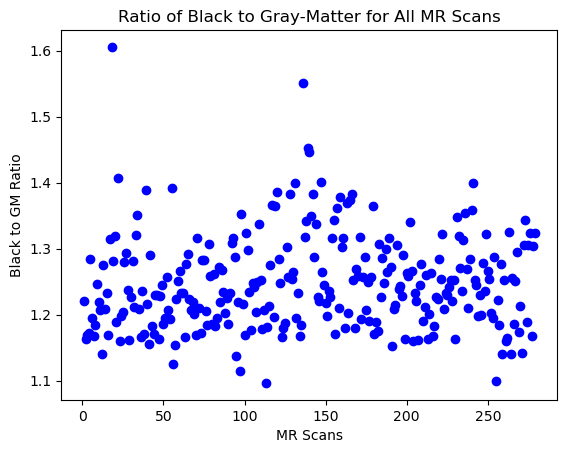

In [102]:
plt.scatter(range(1, len(df["Black_GM_Ratio"]) + 1), df["Black_GM_Ratio"], color='blue', marker='o')
plt.xlabel('MR Scans')
plt.ylabel('Black to GM Ratio')
plt.title('Ratio of Black to Gray-Matter for All MR Scans')
plt.show()

# Plotting the Ratio of Black to Gray-Matter (After Visual Inspection)

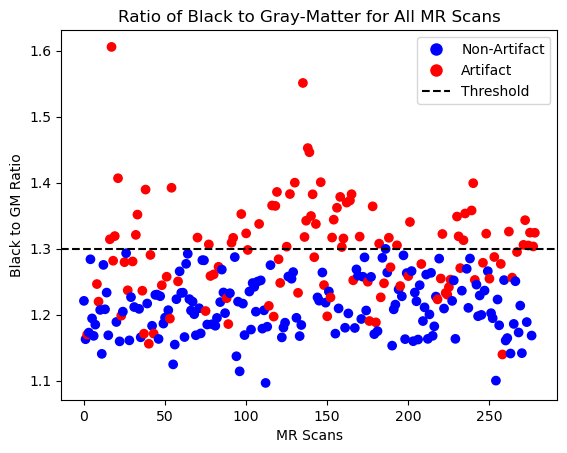

In [103]:
plt.scatter(df.index, df['Black_GM_Ratio'], c=df['Flag'].map({0: 'blue', 1: 'red'}), alpha=1.0, marker='o')
plt.axhline(y=1.3, color='black', linestyle='--')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Non-Artifact', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Artifact', markerfacecolor='red', markersize=10),
                   Line2D([0], [0], linestyle='--', color='black', label='Threshold')]

plt.legend(handles=legend_elements)
plt.xlabel('MR Scans')
plt.ylabel('Black to GM Ratio')
plt.title('Ratio of Black to Gray-Matter for All MR Scans')
plt.show()

# Plotting the Ratio of Black to White-Matter (After Visual Inspection)

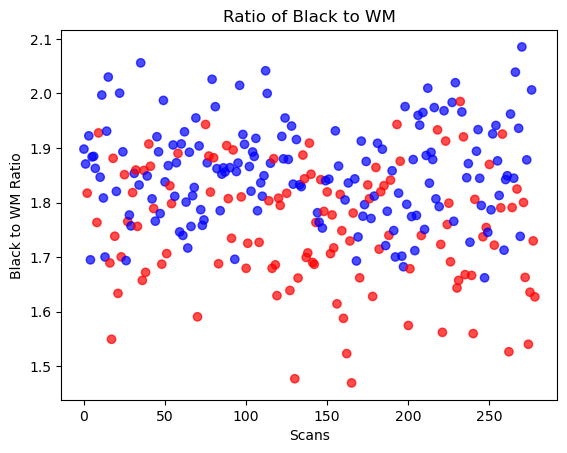

In [105]:
plt.scatter(df.index, df['Black_WM_Ratio'], c=df['Flag'].map({0: 'blue', 1: 'red'}), alpha=0.7, marker='o')

# Adding labels and title
plt.xlabel('Scans')
plt.ylabel('Black to WM Ratio')
plt.title('Ratio of Black to WM')

# Display the plot
plt.show()

# Plotting the Ratio of Black_in_GM to Black_in_WM

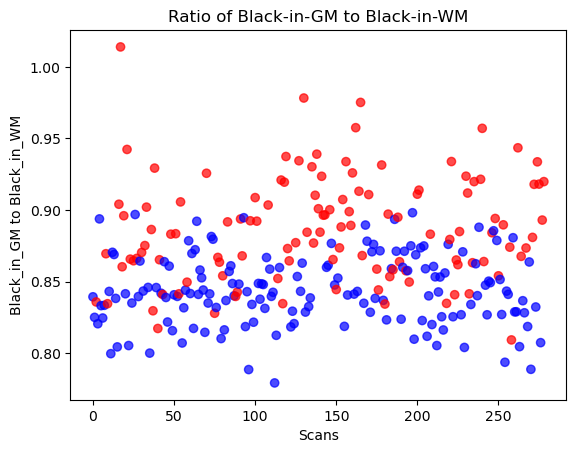

In [106]:
plt.scatter(df.index, df['Ratio_of_Black-in-GM_to_Black-in-WM'], c=df['Flag'].map({0: 'blue', 1: 'red'}), alpha=0.7, marker='o')

# Adding labels and title
plt.xlabel('Scans')
plt.ylabel('Black_in_GM to Black_in_WM')
plt.title('Ratio of Black-in-GM to Black-in-WM')

# Display the plot
plt.show()

# Plotting the Ratio of GM+WM Voxel to Brain Voxel

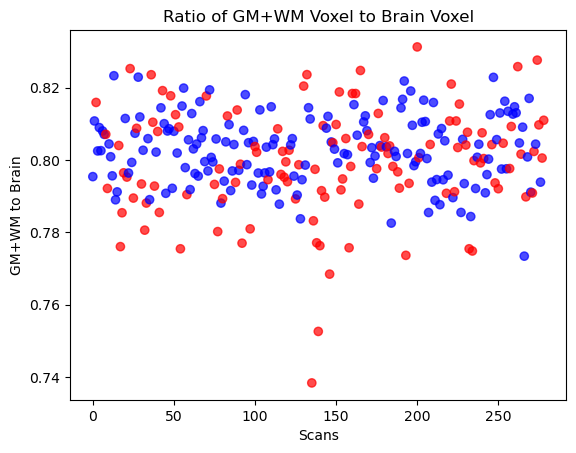

In [107]:
plt.scatter(df.index, df['Ratio_of_GM+WM_to_Brain'], c=df['Flag'].map({0: 'blue', 1: 'red'}), alpha=0.7, marker='o')

# Adding labels and title
plt.xlabel('Scans')
plt.ylabel('GM+WM to Brain')
plt.title('Ratio of GM+WM Voxel to Brain Voxel')

# Display the plot
plt.show()